In [1]:
# Import Required Libraries
try:
    import tensorflow as tf
    import os
    import random
    import numpy as np
    from tqdm import tqdm 
    from skimage.io import imread, imshow
    from skimage.transform import resize
    import matplotlib.pyplot as plt
    from tensorflow.keras.models import load_model
    from keras.models import model_from_json
    print("----Libraries Imported----")
except:
    print("----Libraries Not Imported----")



----Libraries Imported----


In [2]:
# checking the content of the current directory
os.listdir()


['Classification_model.json',
 'Folder_Creater.py',
 'Images',
 'main.ipynb',
 'main.py',
 'Orange_Fruit_Weights2.h5',
 'Prediction_file.py',
 'README.md',
 'rename_image.py',
 'test_data',
 'train_data',
 'UNet_Model.py',
 '__pycache__']

In [3]:
# Setting up path
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3


TRAIN_PATH = 'E:/Projects 6th SEM/Orange-Fruit-Recognition-Using-Image-Segmentation/Image Segmentaion/train_data/'
TEST_PATH = 'E:/Projects 6th SEM/Orange-Fruit-Recognition-Using-Image-Segmentation/Image Segmentaion/test_data/'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(train_ids)
print(test_ids)


['abcd1', 'abcd10', 'abcd11', 'abcd12', 'abcd13', 'abcd14', 'abcd15', 'abcd16', 'abcd17', 'abcd18', 'abcd19', 'abcd2', 'abcd20', 'abcd21', 'abcd22', 'abcd23', 'abcd3', 'abcd4', 'abcd5', 'abcd6', 'abcd7', 'abcd8', 'abcd9']
['xyz1', 'xyz10', 'xyz11', 'xyz12', 'xyz13', 'xyz14', 'xyz15', 'xyz16', 'xyz17', 'xyz18', 'xyz19', 'xyz2', 'xyz20', 'xyz21', 'xyz22', 'xyz23', 'xyz24', 'xyz25', 'xyz26', 'xyz27', 'xyz28', 'xyz29', 'xyz3', 'xyz30', 'xyz31', 'xyz32', 'xyz33', 'xyz34', 'xyz35', 'xyz36', 'xyz37', 'xyz38', 'xyz39', 'xyz4', 'xyz40', 'xyz41', 'xyz42', 'xyz43', 'xyz44', 'xyz45', 'xyz46', 'xyz47', 'xyz48', 'xyz49', 'xyz5', 'xyz50', 'xyz51', 'xyz52', 'xyz53', 'xyz54', 'xyz55', 'xyz56', 'xyz57', 'xyz58', 'xyz59', 'xyz6', 'xyz60', 'xyz61', 'xyz62', 'xyz63', 'xyz64', 'xyz65', 'xyz66', 'xyz67', 'xyz68', 'xyz69', 'xyz7', 'xyz70', 'xyz71', 'xyz72', 'xyz73', 'xyz74', 'xyz75', 'xyz76', 'xyz77', 'xyz8', 'xyz9']


In [4]:
# Loading data

# independent variable
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# dependent variable (what we are trying to predict)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool) 

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS] 
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')


Resizing training images and masks
100%|██████████| 77/77 [00:10<00:00,  7.35it/s]Done!



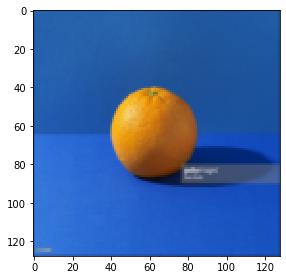

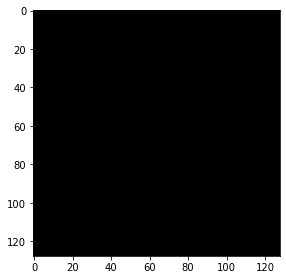

In [5]:
# Showing Random images from the dataset

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()



In [6]:
from UNet_Model import Segmentation_model

model = Segmentation_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [12]:

################################
#Modelcheckpoint

with tf.device('/GPU:0'):
    results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=4, epochs=100)


print('Training DONE')


Epoch 1/100
5/5 [==============================] - 14s 2s/step - loss: 0.4693 - accuracy: 0.7957 - val_loss: 0.5569 - val_accuracy: 0.6373
Epoch 2/100
5/5 [==============================] - 1s 269ms/step - loss: 0.4102 - accuracy: 0.7963 - val_loss: 0.4773 - val_accuracy: 0.6373
Epoch 3/100
5/5 [==============================] - 1s 260ms/step - loss: 0.4068 - accuracy: 0.7963 - val_loss: 0.4523 - val_accuracy: 0.6373
Epoch 4/100
5/5 [==============================] - 1s 261ms/step - loss: 0.3940 - accuracy: 0.7962 - val_loss: 0.4506 - val_accuracy: 0.6373
Epoch 5/100
5/5 [==============================] - 1s 272ms/step - loss: 0.3920 - accuracy: 0.7955 - val_loss: 0.4480 - val_accuracy: 0.6371
Epoch 6/100
5/5 [==============================] - 1s 280ms/step - loss: 0.3884 - accuracy: 0.7951 - val_loss: 0.4344 - val_accuracy: 0.6372
Epoch 7/100
5/5 [==============================] - 1s 245ms/step - loss: 0.3796 - accuracy: 0.7945 - val_loss: 0.4131 - val_accuracy: 0.6372
Epoch 8/100
5/5

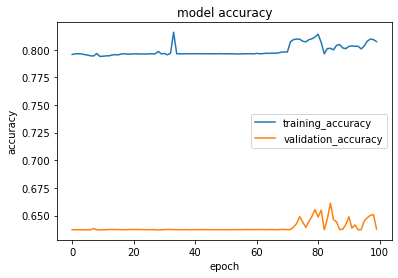

In [13]:
# Plotting Training Results

plt.plot(results.history['accuracy'][0:150])
plt.plot(results.history['val_accuracy'][0:150])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()



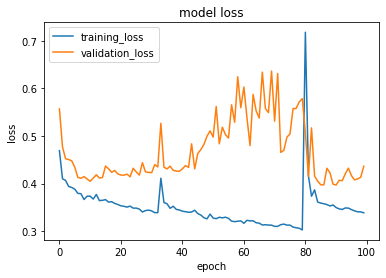

In [14]:

plt.plot(results.history['loss'][0:150])
plt.plot(results.history['val_loss'][0:150])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()



In [15]:
# Saving model

orange_model_json = model.to_json()  
with open("Segmentation_model.json", "w") as json_file:  
    json_file.write(orange_model_json)  
model.save_weights("Orange_Fruit_Weights_segmentation.h5")




In [16]:
# Loading Unet
segmentation_model = model_from_json(open("Segmentation_model.json", "r").read())  
segmentation_model.load_weights('Orange_Fruit_Weights_segmentation.h5')


In [17]:
####################################

idx = random.randint(0, len(X_train))
print(idx)

preds_train = segmentation_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = segmentation_model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = segmentation_model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



6
3/3 [==============================] - 12s 2s/step


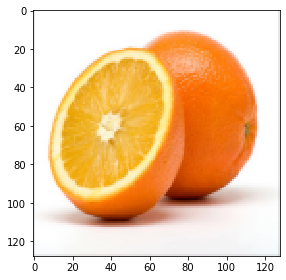

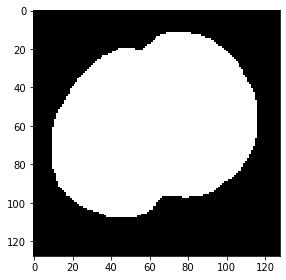

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


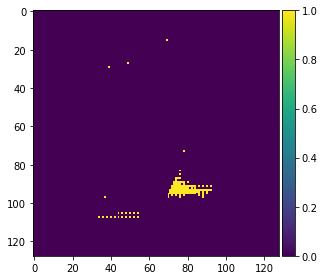

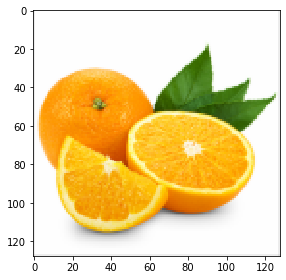

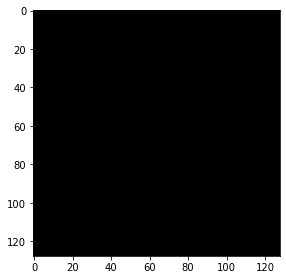

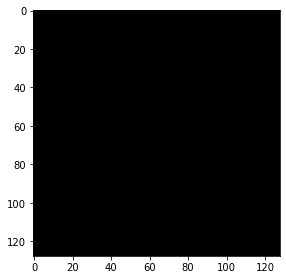

In [18]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


In [19]:
# Loading Classification Model

import Prediction_file as pf
classification_model = pf.Loading_Model()


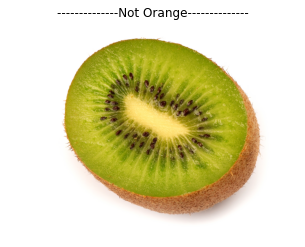

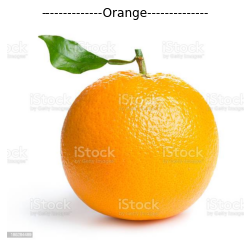

In [20]:
# Prediction

path1 = 'Images/kiwi.jpg'
path2 = 'Images/Orange.jpg'

pred1 = pf.predicting(path1,classification_model)
pred2 = pf.predicting(path2,classification_model)




1/1 [==============================] - 3s 3s/step


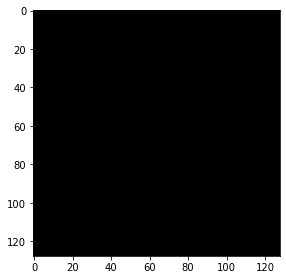

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def process_image(path):
    img = load_img(path, target_size = (IMG_WIDTH,IMG_HEIGHT))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor/=255.0
    return img_tensor

if pred2 > 0.5:
    p = segmentation_model.predict(process_image(path2), verbose=1)
    p_t = (p > 0.5).astype(np.uint8)
    imshow(np.squeeze(p_t))
    plt.show()
    


1/1 [==============================] - 0s 73ms/step


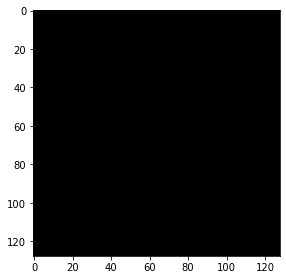

In [22]:
p = segmentation_model.predict(process_image(path1), verbose=1)
p_t = (p > 0.5).astype(np.uint8)
imshow(np.squeeze(p_t))
plt.show()
